In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0


C:\Users\rahul\AppData\Local\Temp\ipykernel_23912\418026059.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
C:\Users\rahul\AppData\Local\Temp\ipykernel_23912\418026059.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


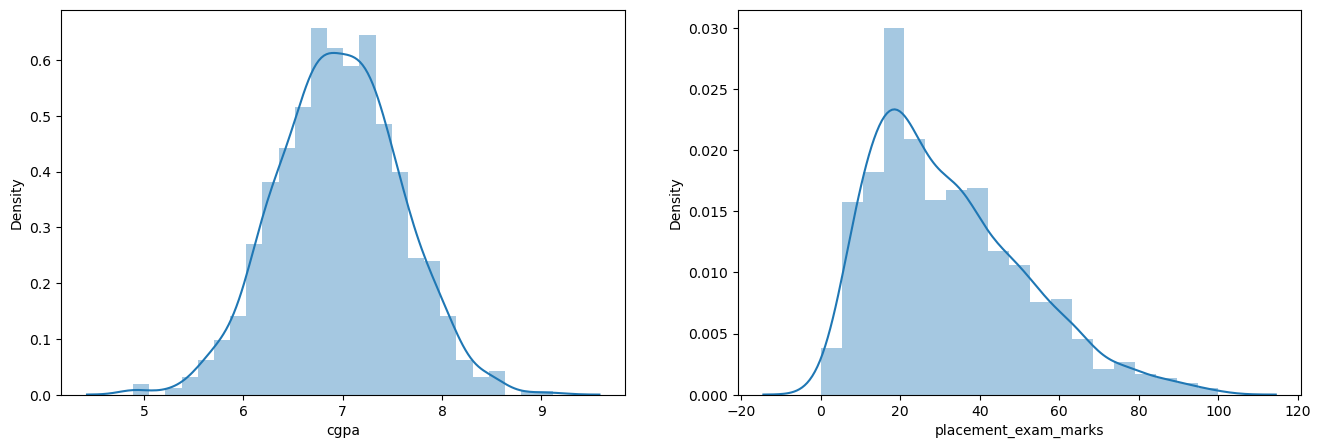

In [8]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)       ##the figure has 1 row, 2 columns, and this plot is the first plot.
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)           #the figure has 1 row, 2 columns, and this plot is the second plot.
sns.distplot(df['placement_exam_marks'])

plt.show()

In [9]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: >

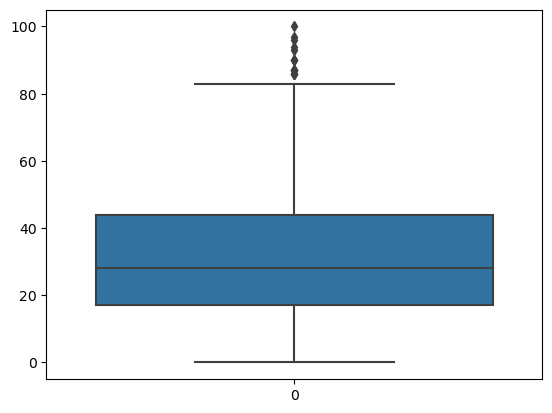

In [10]:
## now we check the outlier

sns.boxplot(df['placement_exam_marks'])

In [12]:
# finding IQR

Q1= df['placement_exam_marks'].quantile(0.25)
Q3= df['placement_exam_marks'].quantile(0.75)

In [13]:
Q1

17.0

In [14]:
Q3

44.0

In [15]:
## cross check from above describe data also

In [16]:
IQR = Q3-Q1

In [17]:
IQR

27.0

In [18]:
upper_limit= Q3+1.5*IQR
lower_limit = Q1-1.5*IQR

In [19]:
print('Upper Limit',upper_limit)
print('Lower Limit', lower_limit)

Upper Limit 84.5
Lower Limit -23.5


# Finding Outlier

In [22]:
df[df['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94,1
40,6.60,86,1
61,7.51,86,0
134,6.33,93,0
162,7.80,90,0
283,7.09,87,0
290,8.38,87,0
311,6.97,87,1
324,6.64,90,0
630,6.56,96,1


In [24]:
## there is 15 outlier above upperlimit

In [25]:
df[df['placement_exam_marks'] < lower_limit]

,cgpa,placement_exam_marks,placed


In [26]:
# no outlier below lowerlimit because min value is 0

# Trimming

In [27]:
new_df= df[df['placement_exam_marks']< upper_limit]

In [29]:
new_df.shape

(985, 3)

C:\Users\rahul\AppData\Local\Temp\ipykernel_23912\1763738065.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
C:\Users\rahul\AppData\Local\Temp\ipykernel_23912\1763738065.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['placement_exam_marks'])


<Axes: >

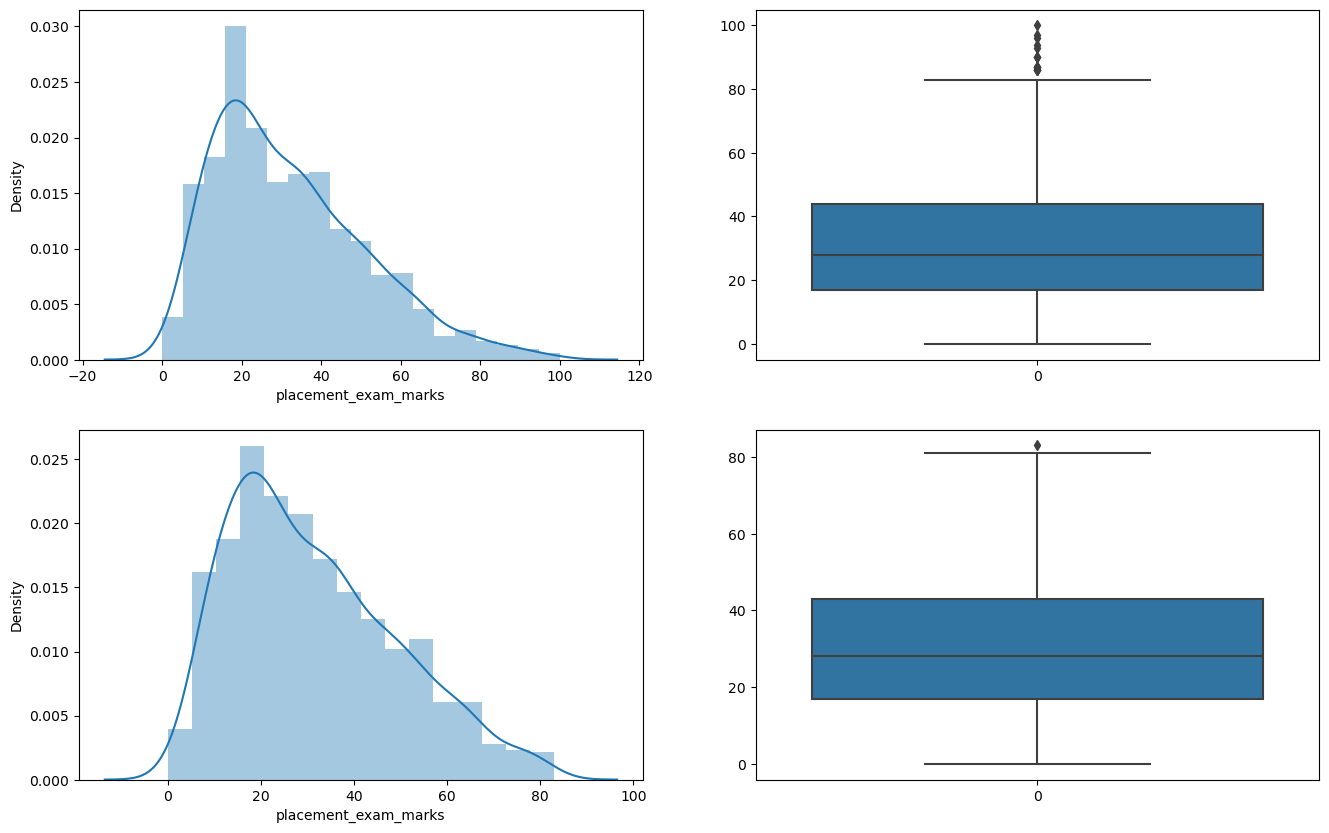

In [33]:
## comparing

plt.figure(figsize=(16,10))

plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])


plt.subplot(2,2,3)
sns.distplot(new_df['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'])



# Capping

In [34]:
new_df_cap = df.copy()

new_df_cap['placement_exam_marks'] = np.where(
new_df_cap['placement_exam_marks']>upper_limit,
upper_limit,
np.where(
new_df_cap['placement_exam_marks']<lower_limit,
lower_limit,
new_df_cap['placement_exam_marks']

))

In [35]:
new_df_cap.shape

(1000, 3)

C:\Users\rahul\AppData\Local\Temp\ipykernel_23912\315282714.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
C:\Users\rahul\AppData\Local\Temp\ipykernel_23912\315282714.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap['placement_exam_marks'])


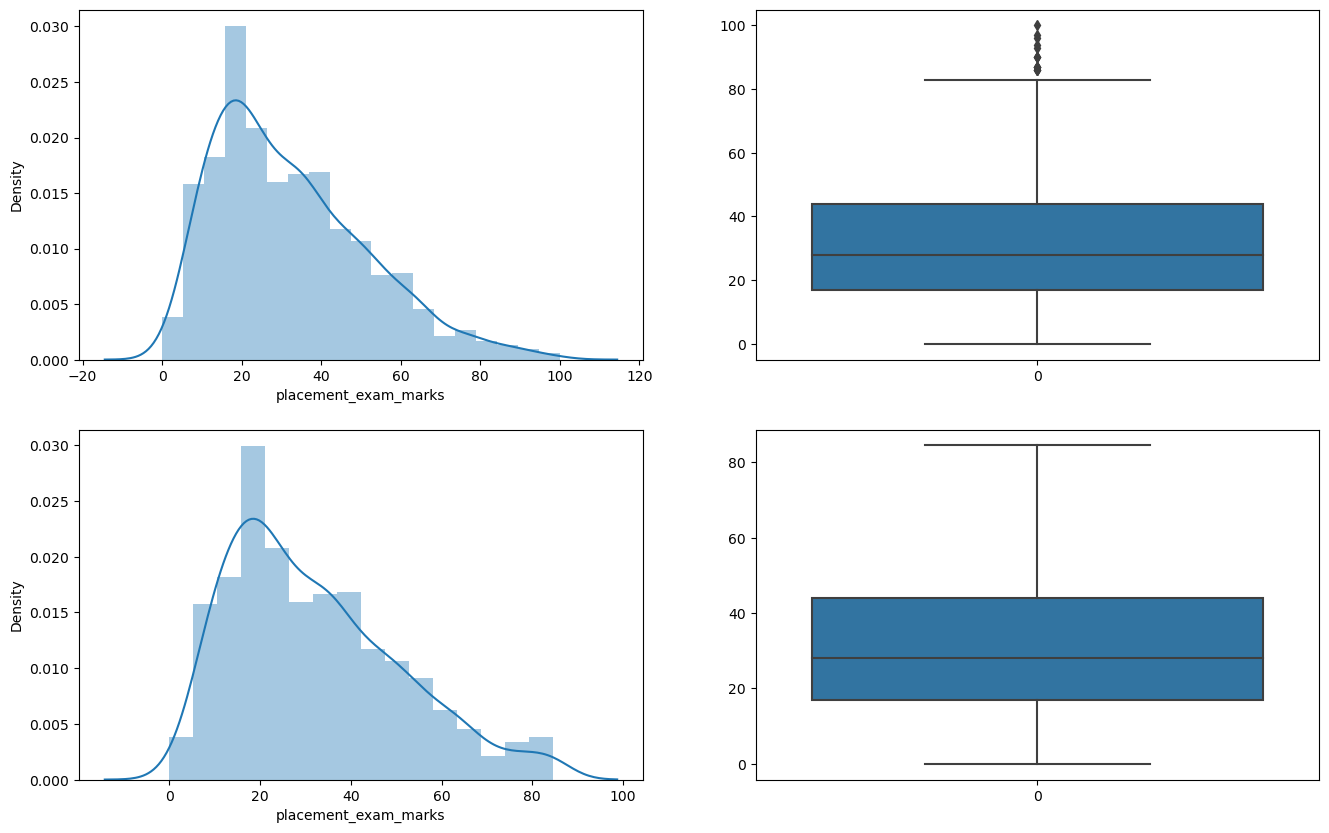

In [37]:
# comparing

plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df_cap['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['placement_exam_marks'])

plt.show()